## Training Fundamentals

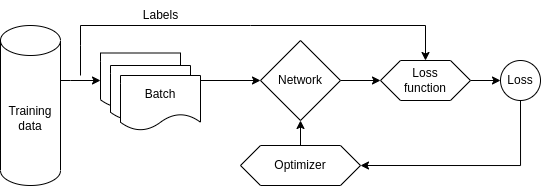

### Datasets

In [1]:
from tensorflow.keras.datasets import mnist

2022-12-22 09:30:57.814678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 09:30:58.050020: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 09:30:58.050040: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 09:30:58.930728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training data: ', x_train.shape, y_train.shape)
print('Test data:', x_test.shape, y_test.shape)

Training data:  (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten 

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

2022-12-22 09:30:59.827983: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-22 09:30:59.828132: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 09:30:59.828151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (latitude): /proc/driver/nvidia/version does not exist
2022-12-22 09:30:59.828606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras.utils import to_categorical  # ValueError: Shapes (32, 1) and (32, 10) are incompatible

y_train = to_categorical(y_train, 10)  # one-hot encoding
y_test = to_categorical(y_test, 10)

model.fit(x_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 1.3741 - acc: 0.9089


To avoid explicite one-hot encoding use `loss=sparse_categorical_crossentropy`

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

(x_train, y_train), (x_test, y_test) = mnist.load_data()

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4744 - acc: 0.9073
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1917 - acc: 0.9496
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1840 - acc: 0.9521
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1559 - acc: 0.9583
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1426 - acc: 0.9631
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1326 - acc: 0.9662
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1169 - acc: 0.9710
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1175 - acc: 0.9724
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1101 - acc: 0.9740
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0918 - acc: 0.9775


### Data Normalization

**Normalization**

In [6]:
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train / 255.).astype(np.float32)
x_test = (x_test / 255.).astype(np.float32)

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1823 - acc: 0.9434
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0801 - acc: 0.9754
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0556 - acc: 0.9821
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0444 - acc: 0.9862
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0327 - acc: 0.9897
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0278 - acc: 0.9910
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0260 - acc: 0.9916
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0228 - acc: 0.9933
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0191 - acc: 0.9941
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0192 - acc: 0.9944


In the prior example, we reached 97% accuracy after the 8th epoch. With normalization the same accuracy was achived after the 2ns epoch.

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1008 - acc: 0.9790


[0.10075441002845764, 0.9789999723434448]

**Standardization**

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

mean = np.mean(x_train)
std = np.std(x_train)
print(f'Dataset mean = {mean}, std = {std}')

Dataset mean = 33.318421449829934, std = 78.56748998339798


In [10]:
x_train = ((x_train - mean) / std).astype(np.float32)
x_test = ((x_test - mean) / std).astype(np.float32)

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1895 - acc: 0.9414
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0947 - acc: 0.9716
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0680 - acc: 0.9796
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0552 - acc: 0.9830
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0511 - acc: 0.9847
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0407 - acc: 0.9878
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0351 - acc: 0.9888
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0352 - acc: 0.9895
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0310 - acc: 0.9910
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0313 - acc: 0.9907


In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1458 - acc: 0.9741


[0.14575611054897308, 0.9740999937057495]

### Validation and Overfitting

In [13]:
from tensorflow.keras.datasets import cifar10

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training data: ', x_train.shape, y_train.shape)
print('Test data:', x_test.shape, y_test.shape)

Training data:  (50000, 32, 32, 3) (50000, 1)
Test data: (10000, 32, 32, 3) (10000, 1)


In [15]:
x_train = (x_train / 255.).astype(np.float32)
x_test = (x_test / 255.).astype(np.float32)

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5363 - acc: 0.4606 - val_loss: 1.3391 - val_acc: 0.5362
Epoch 2/15
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2488 - acc: 0.5645 - val_loss: 1.2733 - val_acc: 0.5636
Epoch 3/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1558 - acc: 0.5989 - val_loss: 1.1794 - val_acc: 0.5900
Epoch 4/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0829 - acc: 0.6257 - val_loss: 1.1348 - val_acc: 0.6108
Epoch 5/15
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0260 - acc: 0.6477 - val_loss: 1.0975 - val_acc: 0.6256
Epoch 6/15
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9793 - acc: 0.6630 - val_loss: 1.0855 - val_acc: 0.6266
Epoch 7/15
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9485 - acc: 0.6738 - val_loss: 1.0700 - val_acc: 0.6384
Epoch 8/15
1407/1407 [==============================] - 8s 6m

Our model clearly started overfitting around the 5th epoch. Let's use **Dropout** to prevent this.

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = (x_train / 255.).astype(np.float32)
x_test = (x_test / 255.).astype(np.float32)

In [18]:
from tensorflow.keras.layers import Dropout

DROPOUT = 0.5

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(DROPOUT))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(x_train, y_train, epochs=20, validation_split=0.1)  # dropout slows down training so we increase `epochs` 

Epoch 1/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5357 - acc: 0.4581 - val_loss: 1.3148 - val_acc: 0.5426
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3046 - acc: 0.5448 - val_loss: 1.2266 - val_acc: 0.5762
Epoch 3/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2402 - acc: 0.5678 - val_loss: 1.1595 - val_acc: 0.6066
Epoch 4/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1895 - acc: 0.5866 - val_loss: 1.1570 - val_acc: 0.6020
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1558 - acc: 0.5963 - val_loss: 1.0997 - val_acc: 0.6208
Epoch 6/20
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1331 - acc: 0.6054 - val_loss: 1.1468 - val_acc: 0.5980
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1166 - acc: 0.6122 - val_loss: 1.0776 - val_acc: 0.6348
Epoch 8/20
1407/1407 [==============================] -

Observe absence of signs of overfitting: train and test accuracy do not spread apart

### Checkpoints and Early Stopping

*Checkpoints* periodically save the learned model parameters and current hyperparameter values during training:

- to be able to resume training of a model where you left off, instead of restarting from the beginning
- to identify a past point in training where the model gave the best result

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

file_path = 'my_model-{epoch:02d}.ckpt'  # save each model with unique name per epoch
checkpoint = ModelCheckpoint(file_path)

# model.fit(x_train, y_train, epochs=epochs, callbacks=[checkpoint])

To restore the model from a checkpoint

In [20]:
from tensorflow.keras.models import load_model

# model = load_model('my_model.ckpt')

For model with a large number of parameters and/or number of epochs, we can choose to save a checkpoint on every *n*th epoch with the parameter `period`:

In [21]:
checkpoint = ModelCheckpoint(file_path, period=4)  # creates a checkpoint for every 4th epoch

Alternatively, we can save the best checkpoint based on some metric

In [22]:
file_path = 'my_best_model.ckpt'
checkpoint = ModelCheckpoint(file_path, save_best_only=True, monitor='val_acc')

# model.fit(x_train, y_train, epochs=epochs, callbacks=[checkpoint])

An *early stopping* is setting a condition upon which training is terminated earlier than the set limits (for example, number of epochs)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc')  # train until validation accuracy increases

# model.fit(x_train, y_train, epochs=epochs, callbacks=[early_stop])

The parameter `patience` specifies a minimum number of epochs without improvement before early stopping, and `min_delta` specifies a minimum threshold to determine whether the model improved

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Hyperparameters

**Epoch**

It is the number of times you will pass the entire training data through the neural network during training. Note, that even though we randomly shuffle the training data at the start of each epoch, its *sampling distribution* is still the same.

**Steps**

Another way to improve accuracy and reduce training time is by changing the sampling distribution of the training dataset. We can learn the best sampling distribution for training a model. Although our training daraset may be fixed, we can use several technics to alter the distribution:

- Regularization/dropout
- Batch Normalization
- Data Augmentation

From this perspective, we no longer see feeding the neural network as sequential passes over the training data, but as making random draws from a sampling distribytion. So *steps* is the number of random batches (draws) we will make from the sampling distribution of our training data *per epoch*.

In [25]:
# model.fit(x_train, y_train, epochs=epochs, steps_per_epoch=1000)

**Batch Size**

In [26]:
# model.fit(x_train, y_train, epochs=epochs, batch_size=32)  # Mini-batch gradient descent

**Learning Rate**

Controls the degree that the model parameters are updated.

In [27]:
# weight += -learning_rate * gradient

The smaller LR:

- guarantees the training will converge on a local optimum
- needs more time to train (bad)
- can stuck on a local non-optimal minimum (bad)

The larger LR:

- initially leads to faster convergence (fewer epochs)
- can overshoot the optimum (bad)
- may start to diverge (bad)

*Learning rate decay:* start with a slightly larger value (find good local optimum), and then gradually decrease it (converge to minimal point).

In [28]:
# weight = -learning_rate * gradient
# learning_rate -= decay

3 common decay strategies:

In [29]:
# learning_rate *= 1 / (1 + decay * iteration)  # time-based decay

# learning_rate *= initial_learning_rate * decay**iteration  # step-based decay

# learning_rate *= const * (1 + math.cos(math.pi * (steps_per_epoch * iteration) / epochs))  # cosine decay

*Momentum:* accelerate or decelerate the rate of change based on prior changes

In [30]:
# velocity = momentum*velocity - learning_rate*gradient
# weights += velocity

*Adaptive learning rate:* Adam, Adagrad, RMSprop, Nesterov, Momentum...

In [31]:
from tensorflow.keras import optimizers

optimizer = optimizers.RMSprop(learning_rate=.001, rho=.9, epsilon=None)

### Invariance

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

IMAGE_PATH = 'images/redpanda.png'

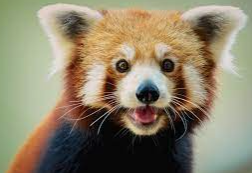

In [2]:
image = Image.open(IMAGE_PATH)
image

**Translation Invariance**
 - vertical/horizontal object location
 - rotation

**Flip**

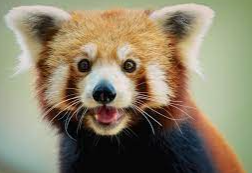

In [3]:
flip = image.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
flip

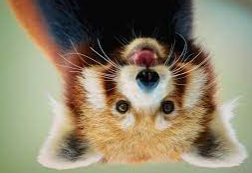

In [4]:
flip = image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
flip

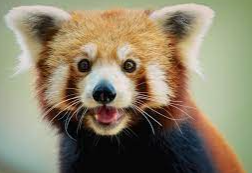

In [5]:
flip = ImageOps.mirror(image)
flip

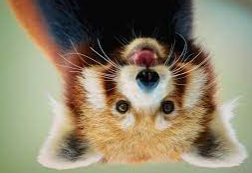

In [6]:
flip = ImageOps.flip(image)
flip

In [12]:
image = cv2.imread(IMAGE_PATH)  # read image as BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert to RGB

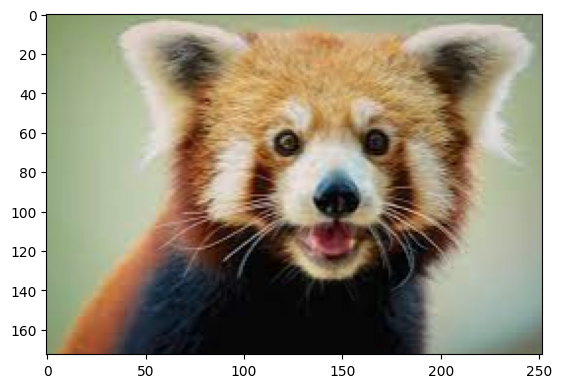

In [14]:
plt.figsize = (2, 3)
plt.imshow(image)
plt.show()

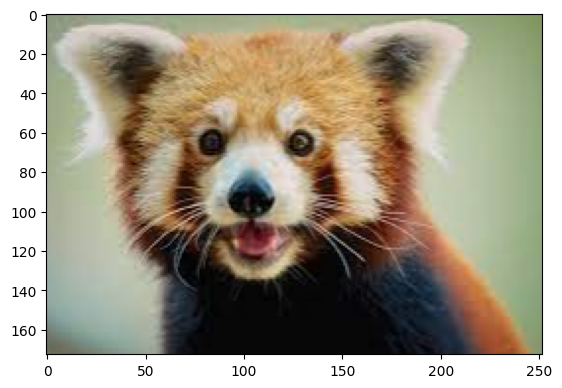

In [16]:
flip = cv2.flip(image, 1)
plt.imshow(flip)

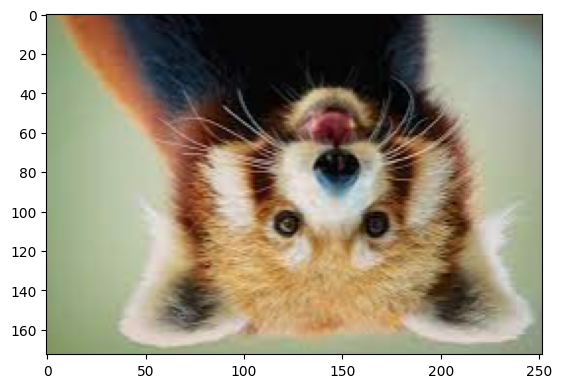

In [17]:
flip = cv2.flip(image, 0)
plt.imshow(flip)

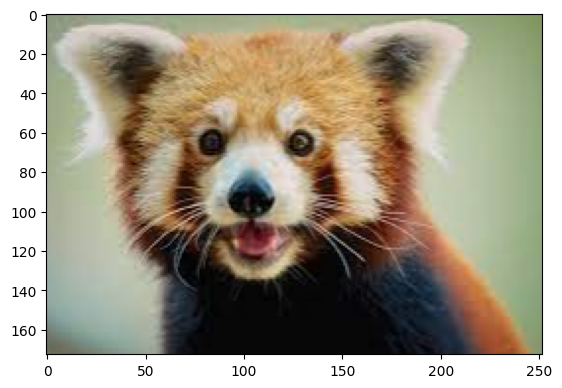

In [20]:
flip = np.flip(image, 1)
plt.imshow(flip)

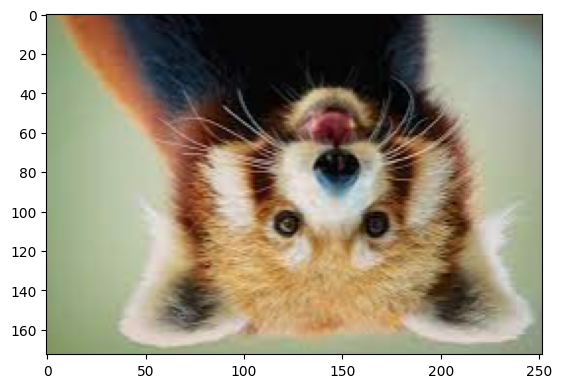

In [21]:
flip = np.flip(image, 0)
plt.imshow(flip)

**Rotate 90/180/270**

In [22]:
image = Image.open(IMAGE_PATH)

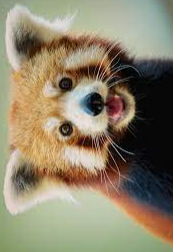

In [25]:
rotate = image.transpose(Image.Transpose.ROTATE_90)
rotate

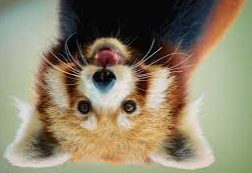

In [27]:
rotate = image.transpose(Image.Transpose.ROTATE_180)
rotate

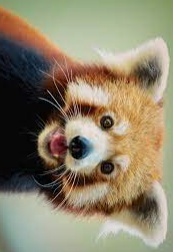

In [28]:
rotate = image.transpose(Image.Transpose.ROTATE_270)
rotate

In [29]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

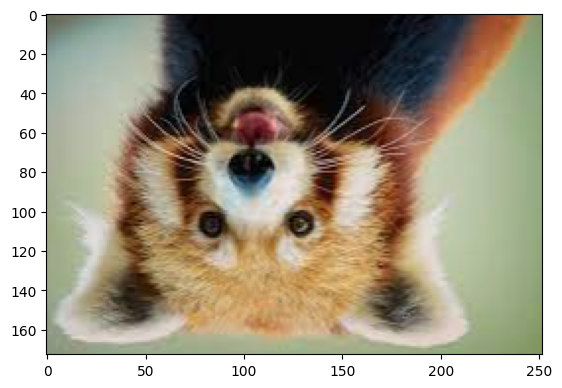

In [30]:
rotate = cv2.flip(image, -1)
plt.imshow(rotate)

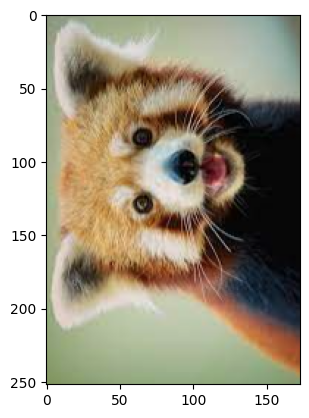

In [32]:
rotate = np.rot90(image, 1)
plt.imshow(rotate)

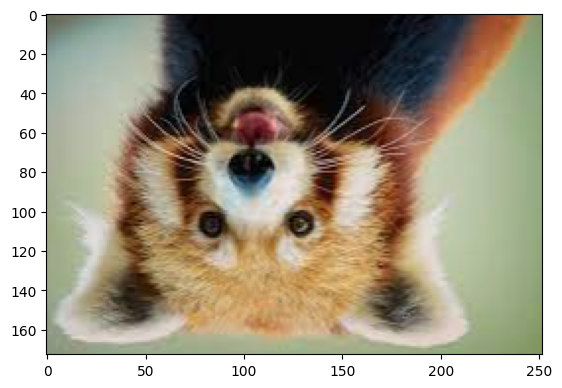

In [33]:
rotate = np.rot90(image, 2)
plt.imshow(rotate)

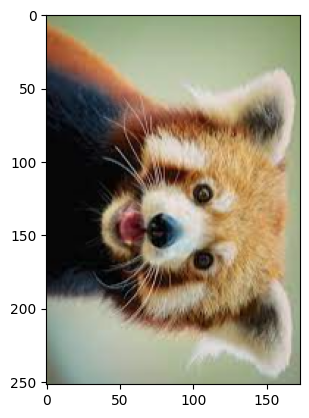

In [35]:
rotate = np.rot90(image, 3)
plt.imshow(rotate)

**Arbitrary Rotation**

We may want to limit the range of rotation to match the environment the model will be deployed in:

- If the images will be dead-on, use a range +- 15 degrees
- If the image be on an incline, use +- 30 degrees
- For small objects use the full range of +- 180 degrees

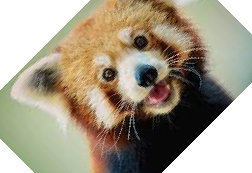

In [39]:
image = Image.open(IMAGE_PATH)
image = image.rotate(45)
image

**Shift**

In [44]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

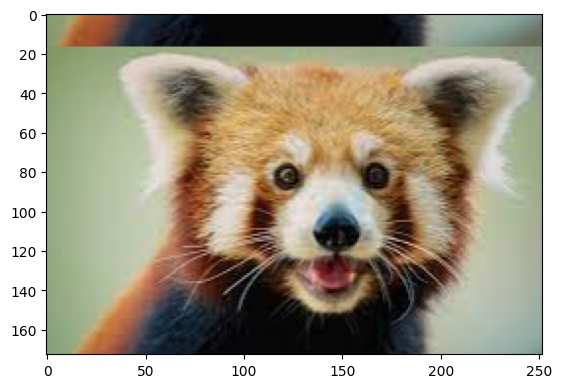

In [48]:
roll = np.roll(image, h // 10, axis=0)  # 10% down
plt.imshow(roll)

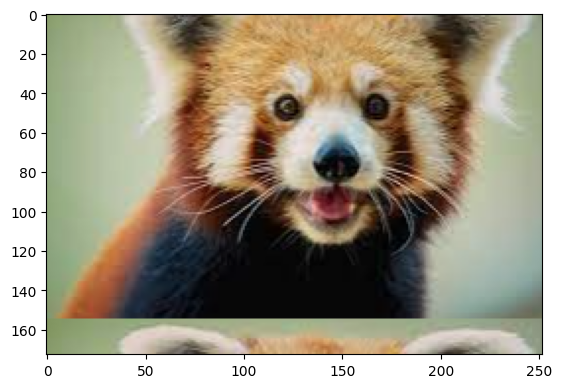

In [49]:
roll = np.roll(image, -h // 10, axis=0)  # 10% up
plt.imshow(roll)

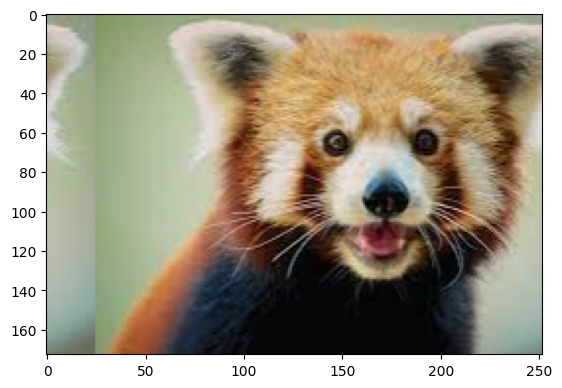

In [50]:
roll = np.roll(image, w // 10, axis=1)  # 10% right
plt.imshow(roll)

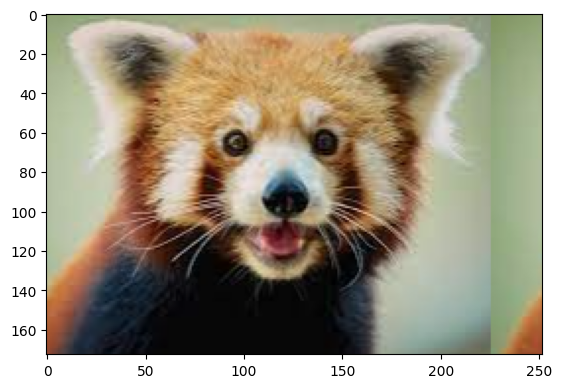

In [51]:
roll = np.roll(image, -w // 10, axis=1)  # 10% left
plt.imshow(roll)

If the shift is too large, the image can become fractured into 2 pieces. To avoid fracturing shift to no more than 20% Alternativly, we could crop the image and fill the space with a black pad.

In [53]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape

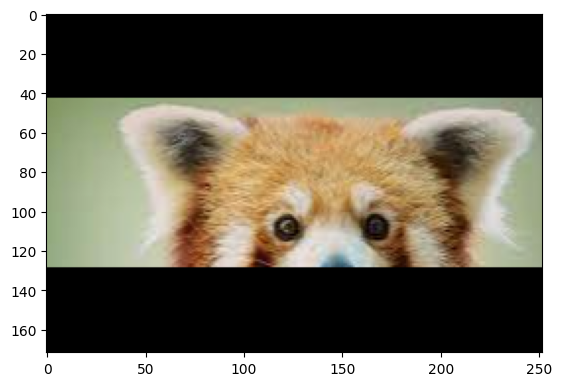

In [54]:
image = image[:h//2, ...]
image = cv2.copyMakeBorder(image, h//4, h//4, 0, 0, cv2.BORDER_CONSTANT, 0)
plt.imshow(image)